<a href="https://colab.research.google.com/github/atikafitriya/Submission/blob/main/Proyek_Analisis_Data_Atika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Atika Habibatul Fitriya]
- **Email:** [atika.habibatulf@gmail.com]
- **ID Dicoding:** [atikaa]

## Menentukan Pertanyaan Bisnis

- Berapa lama estimasi pengiriman barang?
- Berapa revenue perusahaan setiap bulannya?
- Metode pembayaran mana yang paling populer di kalangan pelanggan?
- Dari daerah atau kota mana sajakah pembelian terbanyak berasal?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- pada dataset customer terdapat coloumn customer id, customer unique id, customer zip code prefix(kode pos), customer city, dan negara customer.

In [3]:
order_items_df = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- pada adataset order_items_df terdapat order id, order item id, product_id, seller_id, batas pesanan diantar, harga, dan biaya pengiriman

In [4]:
order_payments_df = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- pada dataeset order_payments_df terdapat coloumn order id, paymnet sequential, payment type, pembayaran angsuran, nilai pembayaran.

In [5]:
order_df = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- pada dataset order_df terdapat coloumn order id, customer id, status order, waktu order, waktu order diterima, tanggal pengiriman barang dari penjual ke kurir, tanggal barang diterima customer, perkiraan tanggal pengiriman selesai.

### Assessing Data

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- type data telah sesuai dengan yang seharusnya
- tidak terdapat kolom yang kosong pada dataset customer_df

In [7]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak terdapat data duplikat pada dataset customer_df

In [8]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- column shipping_limit_date masih berupa object bukan datetime
- type data selain kolom shipping_limit_date telah sesuai dengan yang seharusnya


In [9]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak terdapat duplikasi data pada dataset order_items_df

In [10]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- tidak terdapat keanehan pada data tersebut
- max price yaitu 6735.000000 cukup tinggi dinilai wajar karena price memiliki std yang tinggi yaitu 183.633928

In [11]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- tidak terdapat data kolom yang kosong
- typedata setiap column sudah sesuai

In [12]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak terdapat duplikat pada dataset order_payments_df

In [13]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- pada payment_installments terdapat keanehan karena memiliki nilai minimum 0, sedangkan minimal cicilan adalah satu kali pembayaran

In [14]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- terdapat perbedaan jumlah kolom pada dataset order_df yang berrati masih banyak data kosong
- type data order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya datetime bukan object

In [15]:
order_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- pada kolom order_aproved_at terdaoat 160 cell kosong
- pada kolom order_delivered_carrier_date terdaoat 1783 cell kosong
- pada kolom order_delivered_customer_date terdaoat 2965 cell kosong

In [16]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak terdapat kolom duplikat pada data set order_df

In [17]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Mayoritas Pesanan Berhasil Dikirim: Status "delivered"
- tidak terdapat outlier pada data

### Cleaning Data

In [18]:
#cleaning data dataset order_items_df dengan mengubah tipe data
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Berhasil mengubah shipping_limit_date ke type datetime

In [20]:
#inplace payment_installments yang bernilai 0 di order_payments_df
order_payments_df.loc[order_payments_df['payment_installments'] == 0, 'payment_installments'] = 1

**Insight:**
- mengubah data pada kolom payment_installments yang bernilai 0 menjadi 1

In [21]:
print(order_payments_df['payment_installments'].value_counts())

payment_installments
1     52548
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
22        1
23        1
Name: count, dtype: int64



**Insight:**
- terbukti bahwa pada kolom payment_installments yang berangka 0 telah berubah menjadi 1



In [22]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for column in datetime_columns:
    order_df[column] = pd.to_datetime(order_df[column])

In [23]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Berhasil mengubah data order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date ke type datetime

In [24]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


**Insight:**
- karena pesanan berstatus canceled maka pesanan tidak pernah di approve, sehingga data pada kolom order_approved_at kosong

In [25]:
order_df[order_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


**Insight:**
- beberapa pesanan masih berstatus incoiced mdan processing sehingga data pada kolom order_delivered_carier_date masih kosong, hal ini dikarenakan barang belum dibawa oleh kurir
- beberapa kolom juga telah berstatus canceled, sehingga hal ini menyebabkan data pada kolom order_delivered_carier_date kosong karena status pesanan telah dibatalakan sehingga tidak akan dibawa oleh kurir

In [26]:
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


**Insight:**
- beberapa pesanan masih berstatus incoiced, processing dan shipped sehingga data pada kolom order_delivered_customer_date masih kosong, hal ini dikarenakan barang belum diterima oleh customer.
- beberapa kolom juga telah berstatus canceled, sehingga hal ini menyebabkan data pada kolom order_delivered_customer_date kosong karena status pesanan telah dibatalakan sehingga barang tidak akan sampai ke customer.


## Exploratory Data Analysis (EDA)

### Explore Data customer_df

In [27]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- pada customer_df diketahui bahwa customer_id memiliki kolom unik di setiap kolomnya, berbeda dengan customer_unique_id dimana terdapat beberapa kolom yang sama
- terdapat 4119 city/kota yang telah melakukan order
- terdapat 27 state/negara yang telah melakukan order
- jumlah customer terbanyak terdapat pada kota Sao Paulo
- jumlah customer terbanyak terdapat pada negara bagian SP (Sao Paulo)

In [28]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- diketahui 5 kota dengan jumlah customer terbanyak yaitu kota sao paulo dengan jumlah customer 15540, kedua pada kota rio de janeiro dengan jumlah customer 6882, ketiga pada belo horinzo dengan jumlah customer 2773, keempat di kota brasilia dengan jumlah customer 2131, kelima di kota curitibia dengan jumlah customer 1521.
- diketahui 5 kota dengan jumlah tersedikit yaitu kota ibiara, rio espera, rio dos indios, rios dos cedros, lagoao, dengan masing-masibg kota jumlah customer yaitu 1.

In [29]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Jumlah customer terbanyak berasal dari negara bagian SP (Sao Paulo)
- Jumlah customer tersedikit berasal dari negara bagian RR (Romaira)

### Explore Data order_items_df

In [30]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Insight:**
- Sebagian besar pesanan memiliki hanya 1 item per pesanan
- Terdapat selller yang melayani 2033 pesanan
- Variasi Harga produk cukup bermacam-macam dari yang terkecil 0.850000 dan terbesar 6735.000000
- Product dengan id aca2eb7d00ea1a7b8ebd4e68314663af muncul 527 jaki, hal ini berarti barang ini mejadi produk favorit customer

In [31]:
order_items_df['year'] = order_items_df['shipping_limit_date'].dt.year
order_items_df['month'] = order_items_df['shipping_limit_date'].dt.month
order_items_df['revenue'] = order_items_df['price'] + order_items_df['freight_value']
monthly_revenue = order_items_df.groupby(['year', 'month'])['revenue'].sum().reset_index()
print(monthly_revenue)

    year  month     revenue
0   2016      9      218.52
1   2016     10    56945.07
2   2016     12       19.62
3   2017      1    92198.41
4   2017      2   282731.52
5   2017      3   396542.39
6   2017      4   352845.76
7   2017      5   586221.79
8   2017      6   543623.12
9   2017      7   544850.17
10  2017      8   656244.33
11  2017      9   711614.67
12  2017     10   760543.96
13  2017     11  1027375.70
14  2017     12  1045817.04
15  2018      1   987044.01
16  2018      2   958197.45
17  2018      3  1209226.26
18  2018      4  1116664.98
19  2018      5  1252698.09
20  2018      6  1021381.12
21  2018      7   964848.75
22  2018      8  1259175.95
23  2018      9    16026.36
24  2020      2      175.34
25  2020      4      322.86


**Insight:**
- Tidak adanya data pendapatan pada bulan Oktober 2018 sampai Januari 2020
- Terdapat tren pertumbuhan revenue dari awal tahun hingga akhir tahun, dimana puncaknya pada setiap bulan november-desember. Sehingga pada bulan tersebut sangat opotimal untuk pemberian diskon dan event lainnya

### Explore Data order_payments_df





In [32]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853368,154.100380
std,NaN,0.706584,NaN,2.687034,217.494064
min,NaN,1.000000,NaN,1.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Mayoritas pembayaran menggunakan credit card
- Variasi harga yang perlu dibayarakan oleh customer cukup beragam dari 0-13664.080000

In [33]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


**Insight:**
- ada 5 jenis paymnet_type yaitu credit_card, boleto, voucher, debit_card, dan not defoned
- payment_type not defined kemungkinan dikarenakan adanya diskon atai voucher

In [34]:
not_defined = order_payments_df[order_payments_df['payment_type'] == 'not_defined']
print(not_defined)

                               order_id  payment_sequential payment_type  \
51280  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411  00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
94427  c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

       payment_installments  payment_value  
51280                     1            0.0  
57411                     1            0.0  
94427                     1            0.0  


**Insight:**
- terdapat 3 data yang memiliki payment_type  not_defined dimana setuap datanya memiliki payment_value 0. Hal ini dapat meperkuat dugaan bahwa customer mendapatakn voucher ataupun dikson hingga 0

### Explore Data order_df

In [35]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight:**
- Sebagian besar pesanan berstatus delivered
- order_purchase_timestamp rata-rata disetujui pada hari yang sama berdasarkan pada data di kolom order_approved_at
- Pengiriman tercepat tercatta hanya 3 hari
- Pengriirman terlama tercatat selama 1 bulan

In [36]:
order_df['shipping_duration'] = (order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']).dt.days
print(order_df[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'shipping_duration']])

                               order_id order_purchase_timestamp  \
0      e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1      53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2      47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3      949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4      ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   
...                                 ...                      ...   
99436  9c5dedf39a927c1b2549525ed64a053c      2017-03-09 09:54:05   
99437  63943bddc261676b46f01ca7ac2f7bd8      2018-02-06 12:58:58   
99438  83c1379a015df1e13d02aae0204711ab      2017-08-27 14:46:43   
99439  11c177c8e97725db2631073c19f07b62      2018-01-08 21:28:27   
99440  66dea50a8b16d9b4dee7af250b4be1a5      2018-03-08 20:57:30   

      order_delivered_customer_date  shipping_duration  
0               2017-10-10 21:25:13                8.0  
1               2018-08-07 15:27:45               13.0  
2           

**Insight:**
- Terdapat pesanan dengan waktu pengiriman sangat cepat yaitu lama pengirimannnya 2 hari, dan ada juga yang lebih lama hingga 24 hari.
- Lama pengiriman barang cukup bervariasi anatar 2-24 hari

In [37]:
average_shipping_duration = order_df['shipping_duration'].mean()
print(f"Rata-rata lama pengiriman: {average_shipping_duration:.2f} hari")

Rata-rata lama pengiriman: 12.09 hari


In [38]:
order_df['is_late'] = order_df['order_delivered_customer_date'] > order_df['order_estimated_delivery_date']
late_orders_count = order_df['is_late'].sum()
print(f"Jumlah pesanan yang terlambat: {late_orders_count}")

Jumlah pesanan yang terlambat: 7827


**Insight:**
- Jumlah rata-rata lama pengiriman yaitu 12.09 hari
- Jumlah pesanan yang terlambat yaitu 7827 pesanan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa lama estimasi pengiriman barang?

In [39]:
shipping_duration_order_df = order_df.resample('M', on='order_purchase_timestamp').agg({
    'shipping_duration': 'mean'
}).reset_index()
shipping_duration_order_df['order_purchase_timestamp'] = shipping_duration_order_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
shipping_duration_order_df.rename(columns={
    'shipping_duration': 'average_delivery_time'
}, inplace=True)
shipping_duration_order_df.head()

<ipython-input-39-2213faa3c774>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shipping_duration_order_df = order_df.resample('M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,average_delivery_time
0,2016-09,54.000000
1,2016-10,19.111111
2,2016-11,NaN
3,2016-12,4.000000
4,2017-01,12.092000


<ipython-input-40-7baf4d83ed29>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shipping_duration_order_df = order_df.resample('M', on='order_purchase_timestamp').agg({
<ipython-input-40-7baf4d83ed29>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='order_purchase_timestamp', y='average_delivery_time', data=shipping_duration_order_df, marker='o', palette='viridis')


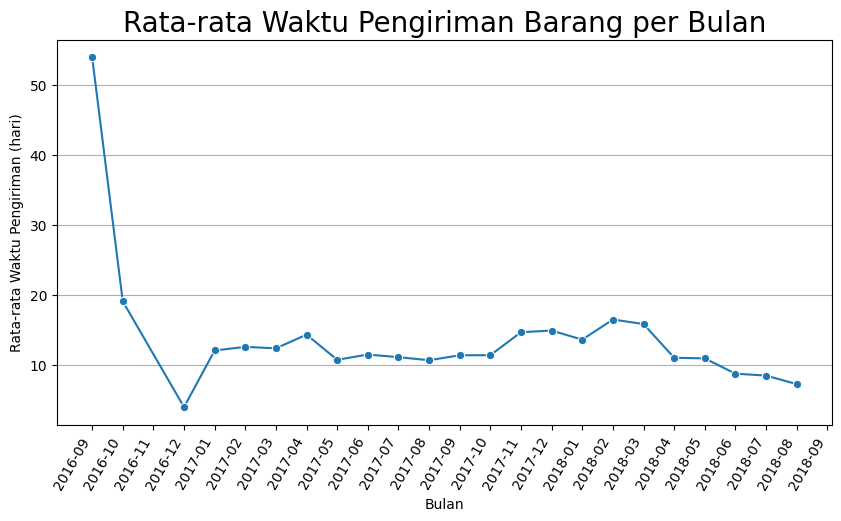

In [40]:
shipping_duration_order_df = order_df.resample('M', on='order_purchase_timestamp').agg({
    'shipping_duration': 'mean'
}).reset_index()
shipping_duration_order_df['order_purchase_timestamp'] = shipping_duration_order_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
shipping_duration_order_df.rename(columns={
    'shipping_duration': 'average_delivery_time'
}, inplace=True)
plt.figure(figsize=(10, 5))
sns.lineplot(x='order_purchase_timestamp', y='average_delivery_time', data=shipping_duration_order_df, marker='o', palette='viridis')
plt.title('Rata-rata Waktu Pengiriman Barang per Bulan', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.xticks(rotation=60,ha='right')
plt.grid(axis='y')
plt.show()

**Insight:**
- Lama pengiriman barang diketahui rata rata lebih dari 10-15 hari pada setiap bulannya
- Pengiriman terlama diketahu terjadi pada bulan September 2016
- Pengiriman tercepat diketahui pada bulan Desember 2016

### Pertanyaan 2: Berapa revenue perusahaan setiap bulannya?

In [41]:
order_items_df['year'] = order_items_df['shipping_limit_date'].dt.year
order_items_df['month'] = order_items_df['shipping_limit_date'].dt.month
order_items_df['revenue'] = order_items_df['price'] + order_items_df['freight_value']
monthly_revenue = order_items_df.groupby(['year', 'month'])['revenue'].sum().reset_index()
monthly_revenue['period'] = monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str).str.zfill(2)
monthly_revenue.head()

,year,month,revenue,period
0,2016,9,218.52,2016-09
1,2016,10,56945.07,2016-10
2,2016,12,19.62,2016-12
3,2017,1,92198.41,2017-01
4,2017,2,282731.52,2017-02


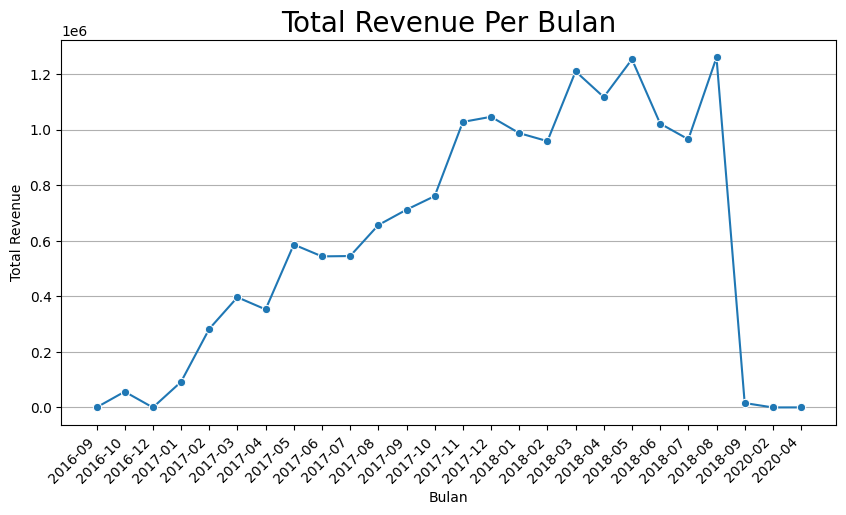

In [42]:
order_items_df['year'] = order_items_df['shipping_limit_date'].dt.year
order_items_df['month'] = order_items_df['shipping_limit_date'].dt.month
order_items_df['revenue'] = order_items_df['price'] + order_items_df['freight_value']
monthly_revenue = order_items_df.groupby(['year', 'month'])['revenue'].sum().reset_index()
monthly_revenue['period'] = monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str).str.zfill(2)
plt.figure(figsize=(10, 5))
sns.lineplot(x='period', y='revenue', data=monthly_revenue, marker='o')
plt.title('Total Revenue Per Bulan', fontsize=20)
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Insight:**
- Total Revenue dari waktu ke waktu semakin naik hal ini menunjukan tanda positif
- Pada data ditunjukkan total revenue meningkat pesat pada akhir tahun 2017

### Pertanyaan 3: Metode pembayaran mana yang paling populer di kalangan pelanggan?

In [43]:
payment_counts = order_payments_df['payment_type'].value_counts()
payment_counts.head()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


<ipython-input-44-11aa813cce93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=['#ADD8E6'])
<ipython-input-44-11aa813cce93>:3: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=['#ADD8E6'])


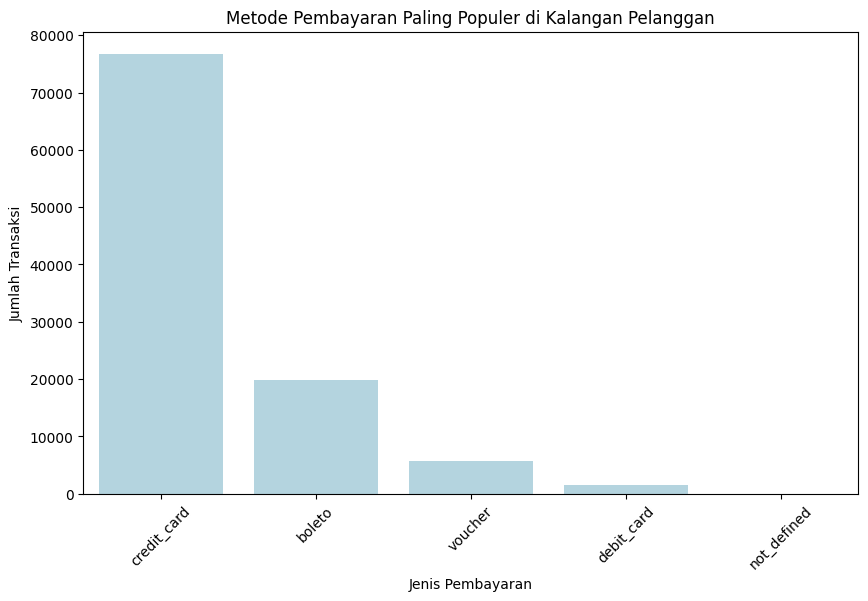

In [44]:
payment_counts = order_payments_df['payment_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette=['#ADD8E6'])
plt.title('Metode Pembayaran Paling Populer di Kalangan Pelanggan')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pada data diketahui paling banyak transaksi menggunakan credit card
- Metode pembayaran kedua paling diduduki oleh bolteo. Boleto merupakan metode pembayaran resmi dan cukup terkenal di Brasil yang menggunakan voucher untuk membayar barang atau jasa.

### Pertanyaan 4: Dari daerah atau kota mana sajakah pembelian terbanyak berasal??

In [45]:
city_counts = customer_df['customer_city'].value_counts()
top_5_cities = city_counts.nlargest(5)
city_counts.head()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


<ipython-input-46-7181ee39abcb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['lightblue'])
<ipython-input-46-7181ee39abcb>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['lightblue'])


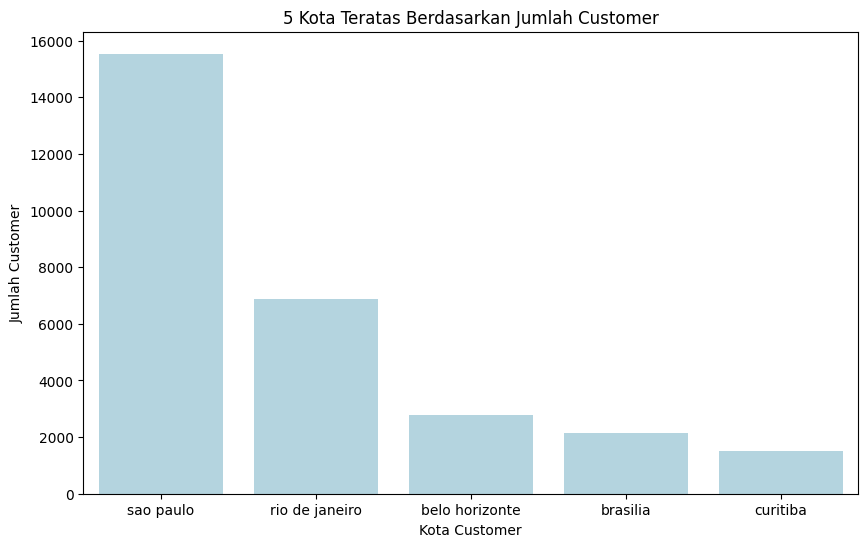

In [46]:
city_counts = customer_df['customer_city'].value_counts()
top_5_cities = city_counts.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['lightblue'])
plt.title('5 Kota Teratas Berdasarkan Jumlah Customer')
plt.xlabel('Kota Customer')
plt.ylabel('Jumlah Customer')
plt.xticks()
plt.show()

**Insight:**
- Diketahui 5 kota dengan jumlah customer terbanyak yaitu kota sao paulo, kedua pada kota rio de janeiro, ketiga kota belo horinzo, keempat di kota brasilia, kelima di kota curitibia.

In [47]:
state_counts = customer_df['customer_state'].value_counts()
top_5_states = state_counts.nlargest(5)
state_counts.head()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


<ipython-input-48-6bb4a5758551>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette=['lightblue'])
<ipython-input-48-6bb4a5758551>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette=['lightblue'])


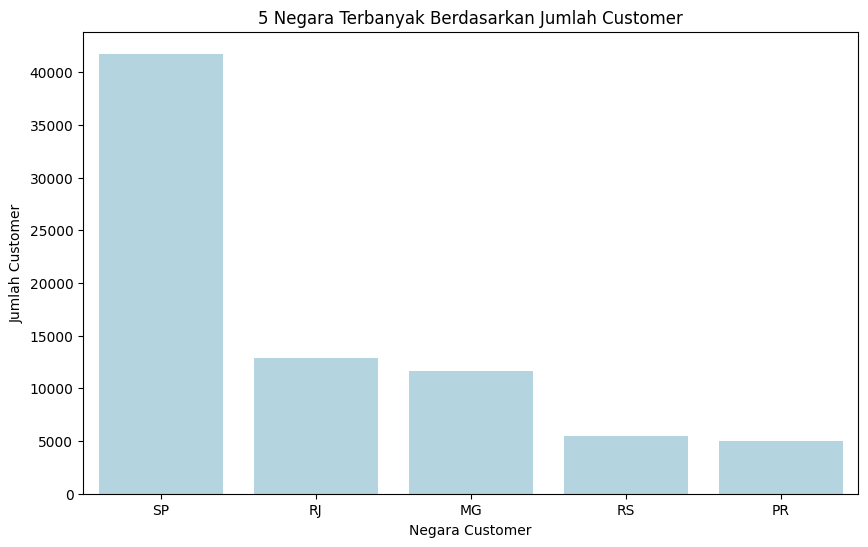

In [48]:
state_counts = customer_df['customer_state'].value_counts()
top_5_states = state_counts.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette=['lightblue'])
plt.title('5 Negara Terbanyak Berdasarkan Jumlah Customer')
plt.xlabel('Negara Customer')
plt.ylabel('Jumlah Customer')
plt.xticks()
plt.show()

**Insight:**
- Diketahui 5 negara bagian di brazil sebagai lokasi terbanyak dari customer dimana pada tempat pertama diduduki Sao Paulo, kedua Rio de Janiero, ketiga di Minas Gerais, keempat di Rio Grande Do sul, kelima di Parana

## RFM Analysis



In [49]:
order_details = order_df.merge(order_items_df, on='order_id', how='left')
order_details = order_details.merge(order_payments_df, on='order_id', how='left')
all_df = order_details.merge(customer_df, left_on='customer_id', right_on='customer_id', how='left')
all_df.to_csv('all_df.csv', index=False)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_duration,is_late,...,month,revenue,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False,...,10.0,38.71,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False,...,10.0,38.71,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,False,...,10.0,38.71,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,False,...,7.0,141.46,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,False,...,8.0,179.12,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [56]:
rfm_df = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
    'payment_value': 'sum'
})

rfm_df = rfm_df.reset_index()

rfm_df.columns = ['customer_id','max_order_timestamp', 'frequency', 'monetary']

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.to_csv('rfm_analysis.csv', index=False)
rfm_df.head(10)

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198
5,0004164d20a9e969af783496f3408652,2017-04-12,1,71.80,553
6,000419c5494106c306a97b5635748086,2018-03-02,1,49.40,229
7,00046a560d407e99b969756e0b10f282,2017-12-18,1,166.59,303
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17,1,85.23,395
9,000598caf2ef4117407665ac33275130,2018-08-11,1,1255.71,67


<ipython-input-58-7430c0396259>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=["#72BCD4"], ax=ax[0])
<ipython-input-58-7430c0396259>:3: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=["#72BCD4"], ax=ax[0])
<ipython-input-58-7430c0396259>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=["#72B

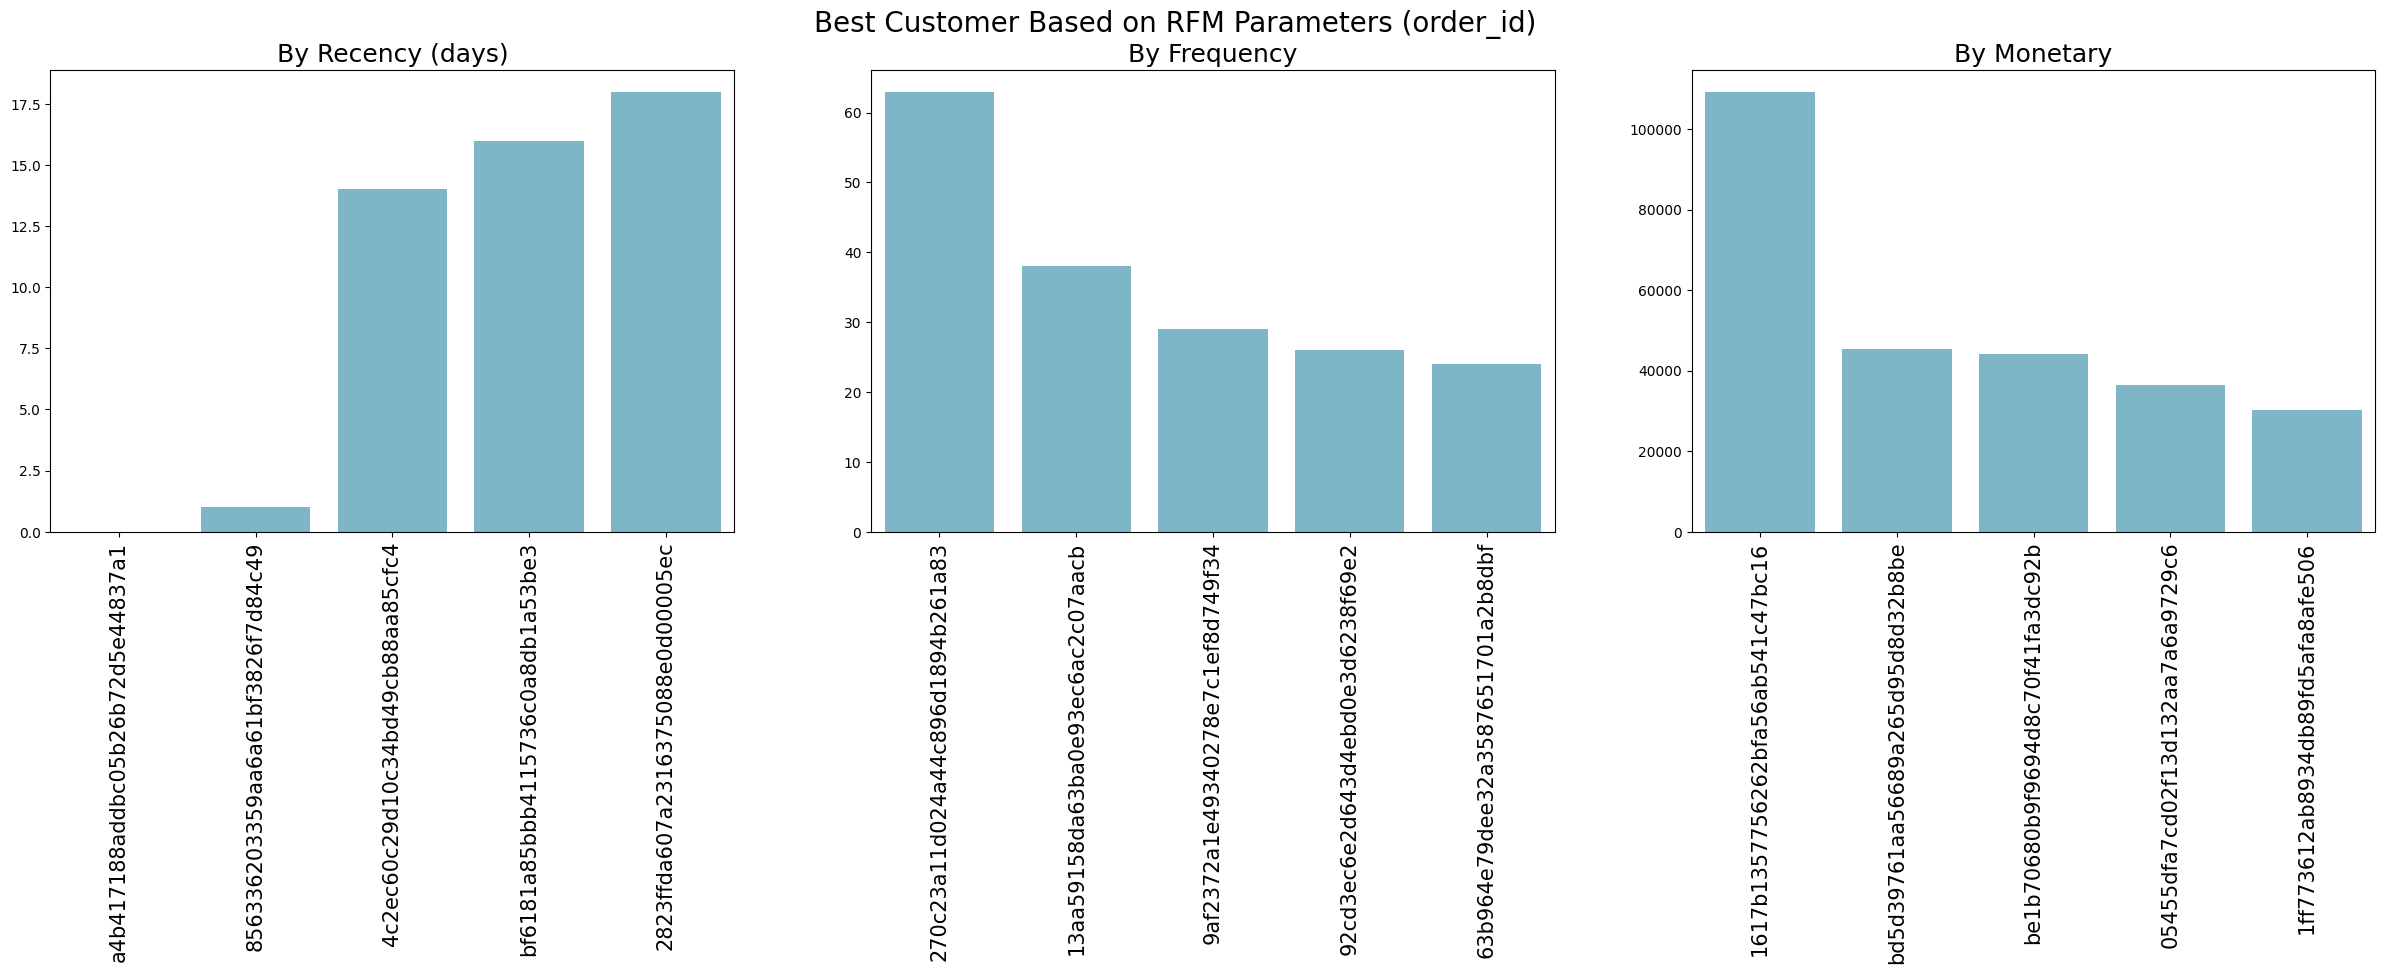

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=["#72BCD4"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=["#72BCD4"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=["#72BCD4"], ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (order_id)", fontsize=20)
plt.show()

In [52]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Pada analisis dataset E-commerce Public Dataset didapatkan bahwa rata-rata lama pengiriman setiap barang membutuhkan waktu 10-15 hari. Oleh karena itu diperlukan optimalisasi untuk jasa kirim agar pengiriman lebih cepat sampai ke customer
- Pada analisis dataset E-commerce Public Dataset didapatkan bahwa revenue perusahaan setiap bulannya naik secara poistif. Hal ini dapat dikembangkan dengan mengiklankan E-commerce baik dengan advertisements mauapun menggunakan diskon
- Pada analisis dataset E-commerce Public Dataset didapatkan bahwa metode pembayaran mana yang paling populer di kalangan customer adalah menggunakan credit card. Hal ini dapat dimanfaatkan oleh perusahaan untuk bekerja sama dengan bank penyedia credit card untuk memberikan kemudahan akses untuk customer. Dimana nantinya juga akan membantu meningkatkan jumlah pelanggan di kemudian hari.
- Pada analisis dataset E-commerce Public Dataset didapatkan bahwa kota dengan customer terbanyak adalah Sao Paulo. E-commerce dapat meningkatkan SEO di Sao Paulo untuk mengoptimalisasi kampanye digital dalam rangka meningkatkan pelanggan. kebiasaan dan demografi customer di Sao Paulo juga dapat digunakan untuk menarik perhatian customer di kota lainnnya.